# Data Cleaning and Preprocessing on Netflix Originals Data

- Perform the initial analysis on the dataset. Print the first 10 rows of the data to see how the data looks like.

In [247]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
)

In [248]:
# Read input data
df = pd.read_csv("netflix_originals.csv")

In [249]:
# Display first 10 rows
df.head(10)

,titles,years,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
5,YooHoo to the Rescue,2019,Family,6.9,NaN,"In a series of magical missions, quick-witted ...","Ryan Bartley, Kira Buckland, Lucien Dodge, Kyl...",37,TV Show,Netflix
6,Yankee,2019,Drama,6.0,40 min,"On the run from the police, an Arizona man cro...","Pablo Lyle, Ana Layevska, Pamela Almanza, Seba...",458,TV Show,Netflix
7,Wu Assassins,2019,"Action, Crime, Drama",6.4,44 min,A warrior chosen as the latest and last Wu Ass...,"Iko Uwais, Byron Mann, Li Jun Li, Lawrence Kao","9,336",TV Show,Netflix
8,World's Most Wanted,2020,"Documentary, Crime",7.1,NaN,Heinous criminals have avoided capture despite...,"Jennifer Julian, Thomas Fuentes, Calogero Germ...","1,495",TV Show,Netflix
9,World of Winx,2016,"Animation, Action, Comedy",6.8,30 min,The Winx travel all over the world searching f...,"Rebecca Soler, Alysha Deslorieux, Haven Pascha...",556,TV Show,Netflix


- Print the shape of the data to find the number of rows and columns.

In [250]:
# Obtain the rows and columns
df.shape

(1517, 10)

- The genre column has multiple values in each row. As a part of cleaning, extract only the first genre from each row.

In [251]:
# Extract the first genre
df['genres'] = df['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) and ',' in x else x)


- Find the number of missing values in the data. If there are missing values, what method will you choose for each of the columns? Choose between mean/median/mode imputation, ffill, bfill, dropping the missing values. Please provide clear justification for choosing a particular approach.

In [252]:
# Find the number of missing values
print("\nMissing values in the dataset:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values in the dataset:
titles           0
years            0
genres           1
imdb             5
runtime        241
description      0
stars           28
votes            1
type             0
original         0
dtype: int64


In [253]:
# Confirm data types of the columns
df.dtypes

titles          object
years            int64
genres          object
imdb           float64
runtime         object
description     object
stars           object
votes           object
type            object
original        object
dtype: object

In [254]:
# Imputation Strategy
# Justification:
# - For numerical columns, use mean/median imputation based on the distribution.
# - For categorical columns, use mode imputation.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        if df[col].skew() > 1:  # Highly skewed
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/m7/2d5d832j3j300wwm7q5ptzdh0000gn/T/ipykernel_6613/64755715.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/m7/2d5d832j3j300wwm7q5ptzdh0000gn/T/ipykernel_6613/64755715.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

- Plot the histograms for numerical data.

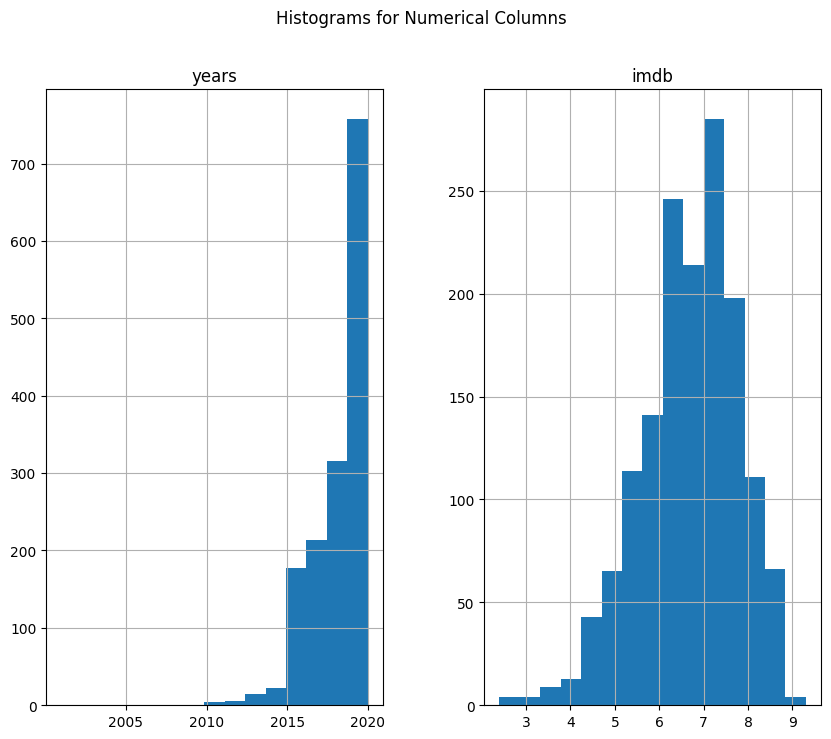

In [255]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(10, 8), bins=15)
plt.suptitle('Histograms for Numerical Columns')
plt.show()

- Plot the bar chart for top 10 genres.
top_genres = data['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

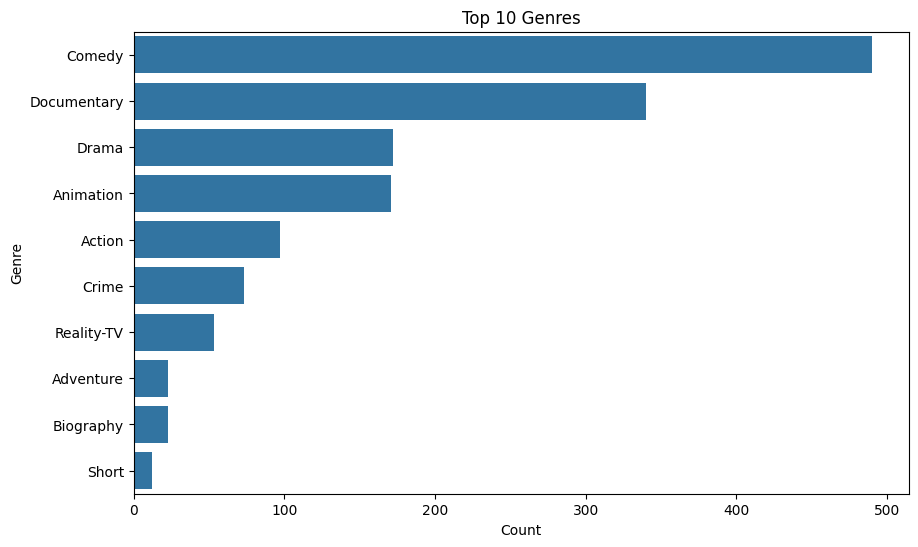

In [256]:
top_genres = df['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

- Plot the line chart for the number of releases per year.

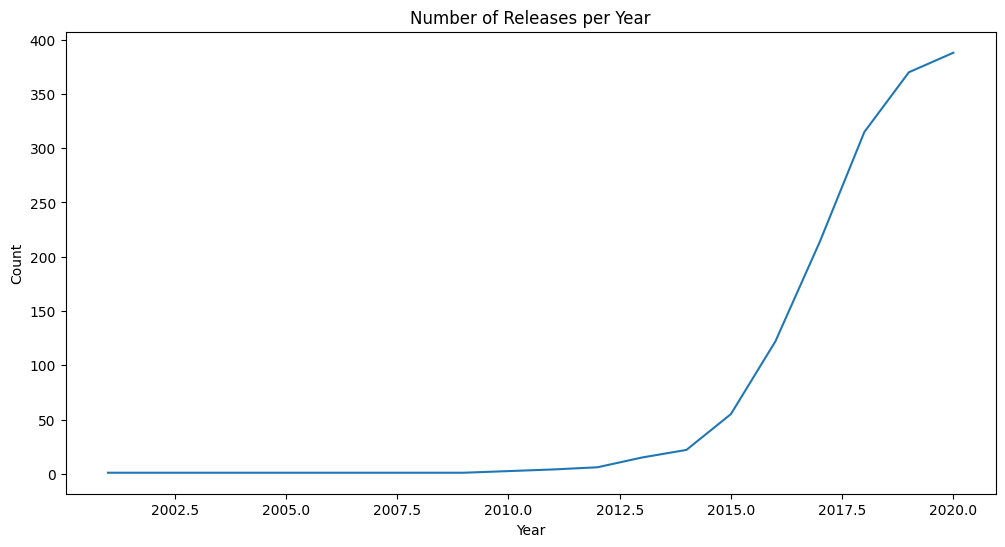

In [257]:
releases_per_year = df['years'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=releases_per_year.index, y=releases_per_year.values)
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

- Plot the sunburst chart for the distribution of genres by content type. (Use plotly library).

In [258]:
sunburst_data = df.groupby(['type', 'genres']).size().reset_index(name='counts')
fig = px.sunburst(sunburst_data, path=['type', 'genres'], values='counts', title='Distribution of Genres by Content Type')
fig.show()


- Perform encoding on the categorical data. Choose between label encoding, one hot encoding or ordinal encoding and provide a clear justification for choosing a particular encoding method.

In [259]:
# Encoding categorical data
# One-Hot Encoding for genre, Label Encoding for content_type
df['type'] = LabelEncoder().fit_transform(df['type'])
genre_dummies = pd.get_dummies(df['genres'], prefix='genres')
data = pd.concat([df, genre_dummies], axis=1)
data.drop('genres', axis=1, inplace=True)

- Identify if there are any outliers in the data. If so, handle the outliers (Refer to the lecture notebook).

In [260]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

- If given an option to replace the outliers with 0, would you do that? Why or why not? Provide clear justification.  

    Replacing outliers with 0 might distort the meaning of the data.  
    Instead, capping the values ensures that the data stays within a reasonable range.

- Perform all feature scaling techniques using StandardScaler, MinMaxScaler and RobustScaler. Which method is the most appropriate for this data and why? Please provide a clear explanation.

In [ ]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Recommendation:
# - If data is normally distributed: Use StandardScaler.
# - If data has outliers: Use RobustScaler.
# - If all features should be scaled to [0, 1]: Use MinMaxScaler.
scaled_data = {}
for name, scaler in scalers.items():
    scaled_data[name] = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)
    print(f"\n{name} - First 5 rows of scaled data:")
    print(scaled_data[name].head())


StandardScaler - First 5 rows of scaled data:
      years      imdb
0 -1.154352  0.195210
1  0.460109 -0.623913
2  0.998262  0.013183
3  0.460109  0.013183
4 -0.078045  1.014333

MinMaxScaler - First 5 rows of scaled data:
      years      imdb
0  0.789474  0.652174
1  0.947368  0.521739
2  1.000000  0.623188
3  0.947368  0.623188
4  0.894737  0.782609

RobustScaler - First 5 rows of scaled data:
      years      imdb
0 -0.666667  0.071429
1  0.333333 -0.571429
2  0.666667 -0.071429
3  0.333333 -0.071429
4  0.000000  0.714286


### Which Scaling Method is the Most Appropriate?

### Based on the result:

- RobustScaler is the most appropriate method for this dataset because:
    - It effectively handles outliers without distorting the relative relationships in the data.
    - Both years and imdb are scaled to a balanced range, making the data suitable for machine learning models.

- StandardScaler can be considered if:
    - The data is confirmed to follow a normal distribution.
    - Outliers are minimal or have been handled beforehand.

- MinMaxScaler is less ideal in this case because:
    - Its sensitivity to outliers may compress the scaling of non-extreme values, reducing its effectiveness.